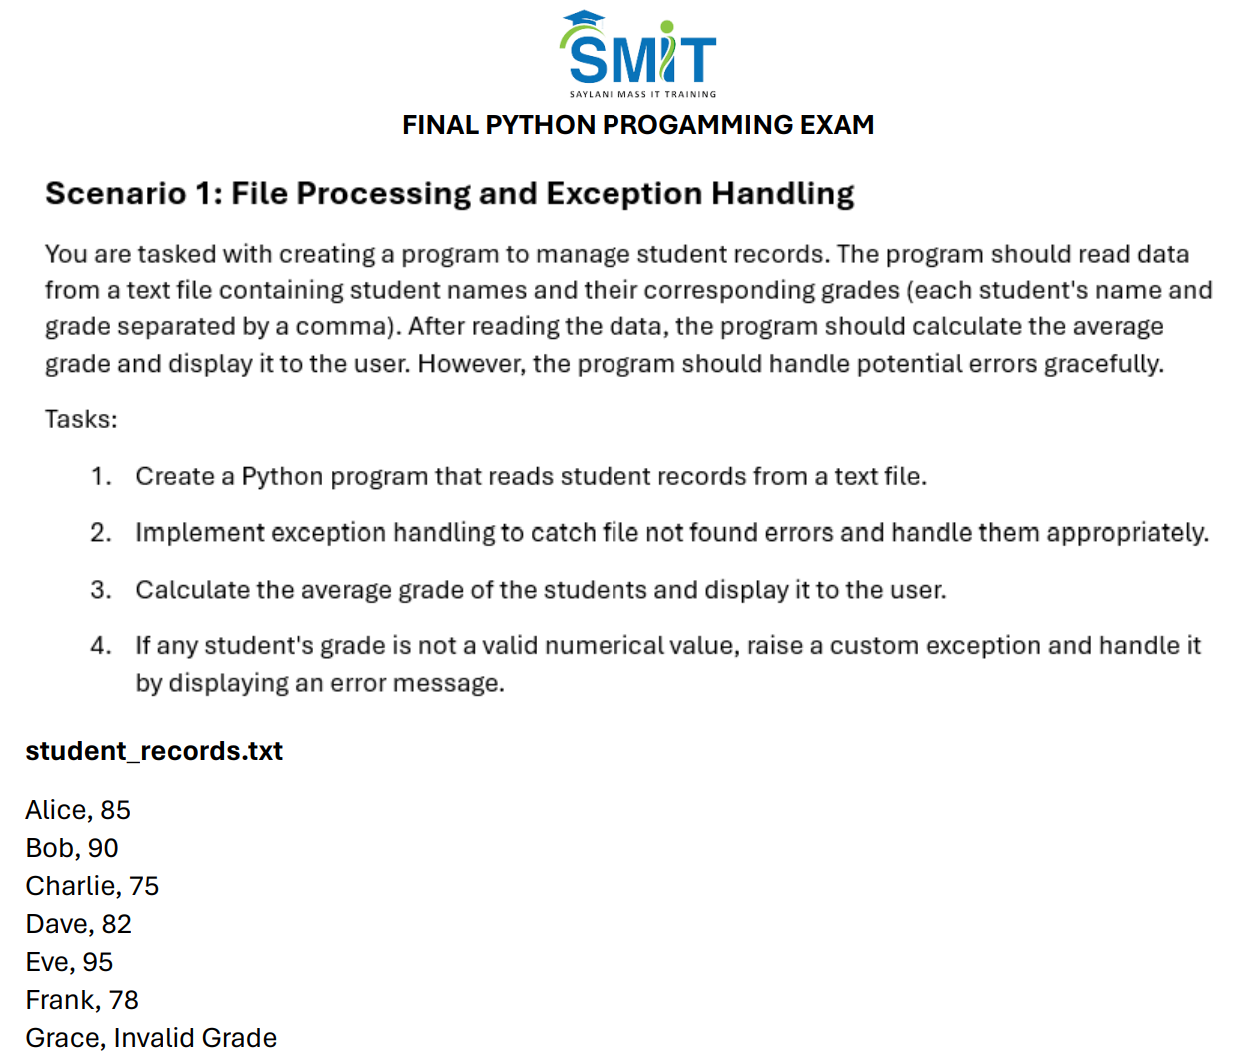

In [12]:
try:
    with open("student_record.txt", "r") as file:
        lines = file.readlines()

        total = 0
        count = 0

    print("Student Grades:")
    for line in lines:
        try:
            name, grade = line.strip().split(",")
            grade = grade.strip()

            grade_value = int(grade)
            if 0 <= grade_value <= 100:
                print(f"{name}: {grade_value}")
                total += grade_value
                count += 1
            else:
                print(f"{name}: Invalid Grade (out of range)")
        except ValueError:
            print(f"{line.strip()}: Invalid Grade (not a number or format)")

    if count > 0:
        average = total / count
        print(f"\nAverage Grade: {average:.2f}")
    else:
        print("\nNo valid grades to calculate average.")
except FileNoFoundError as e:
    print(e)

Student Grades:
Areeb: 72
Urooj: 89
Sidra: 99
Ahmed: 100
Grace, Invalid Grade: Invalid Grade (not a number or format)

Average Grade: 90.00


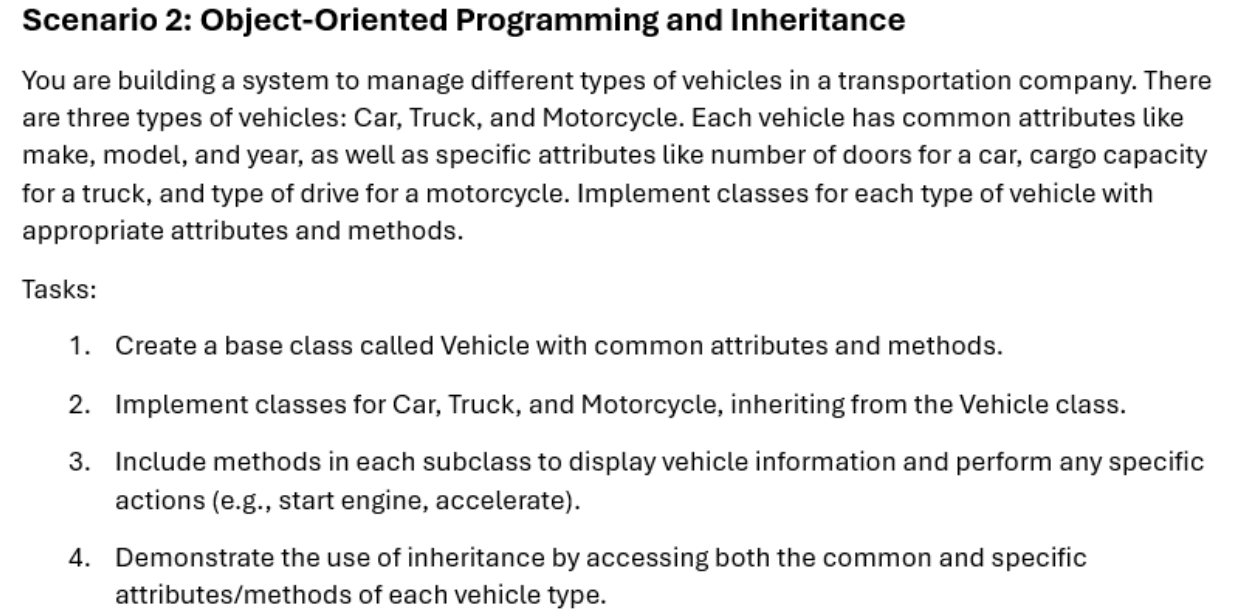

In [14]:
class Vehicle:
    def __init__(self, make, model, year):
        self.make = make
        self.model = model
        self.year = year

    def display_info(self):
        print(f"Make: {self.make}")
        print(f"Model: {self.model}")
        print(f"Year: {self.year}")

    def start_engine(self):
        print(f"{self.make} {self.model}'s engine started.")

    def stop_engine(self):
        print(f"{self.make} {self.model}'s engine stopped.")


class Car(Vehicle):
    def __init__(self, make, model, year, doors):
        super().__init__(make, model, year)
        self.doors = doors

    def display_info(self):
        super().display_info()
        print(f"Number of doors: {self.doors}")

    def accelerate(self):
        print(f"{self.make} {self.model} is accelerating on the road!")


class Truck(Vehicle):
    def __init__(self, make, model, year, cargo_capacity):
        super().__init__(make, model, year)
        self.cargo_capacity = cargo_capacity  

    def display_info(self):
        super().display_info()
        print(f"Cargo capacity: {self.cargo_capacity} tons")

    def load_cargo(self):
        print(f"{self.make} {self.model} is loading {self.cargo_capacity} tons of cargo.")


class Motorcycle(Vehicle):
    def __init__(self, make, model, year, drive_type):
        super().__init__(make, model, year)
        self.drive_type = drive_type  

    def display_info(self):
        super().display_info()
        print(f"Drive type: {self.drive_type}")

    def wheelie(self):
        print(f"{self.make} {self.model} is doing a wheelie!")


car1 = Car("Toyota", "Corolla", 2020, 4)
truck1 = Truck("Volvo", "FH16", 2022, 25)
bike1 = Motorcycle("Yamaha", "R1", 2021, "Chain Drive")

print("\n--- Car Info ---")
car1.display_info()
car1.start_engine()
car1.accelerate()
car1.stop_engine()

print("\n--- Truck Info ---")
truck1.display_info()
truck1.start_engine()
truck1.load_cargo()
truck1.stop_engine()

print("\n--- Motorcycle Info ---")
bike1.display_info()
bike1.start_engine()
bike1.wheelie()
bike1.stop_engine()



--- Car Info ---
Make: Toyota
Model: Corolla
Year: 2020
Number of doors: 4
Toyota Corolla's engine started.
Toyota Corolla is accelerating on the road!
Toyota Corolla's engine stopped.

--- Truck Info ---
Make: Volvo
Model: FH16
Year: 2022
Cargo capacity: 25 tons
Volvo FH16's engine started.
Volvo FH16 is loading 25 tons of cargo.
Volvo FH16's engine stopped.

--- Motorcycle Info ---
Make: Yamaha
Model: R1
Year: 2021
Drive type: Chain Drive
Yamaha R1's engine started.
Yamaha R1 is doing a wheelie!
Yamaha R1's engine stopped.


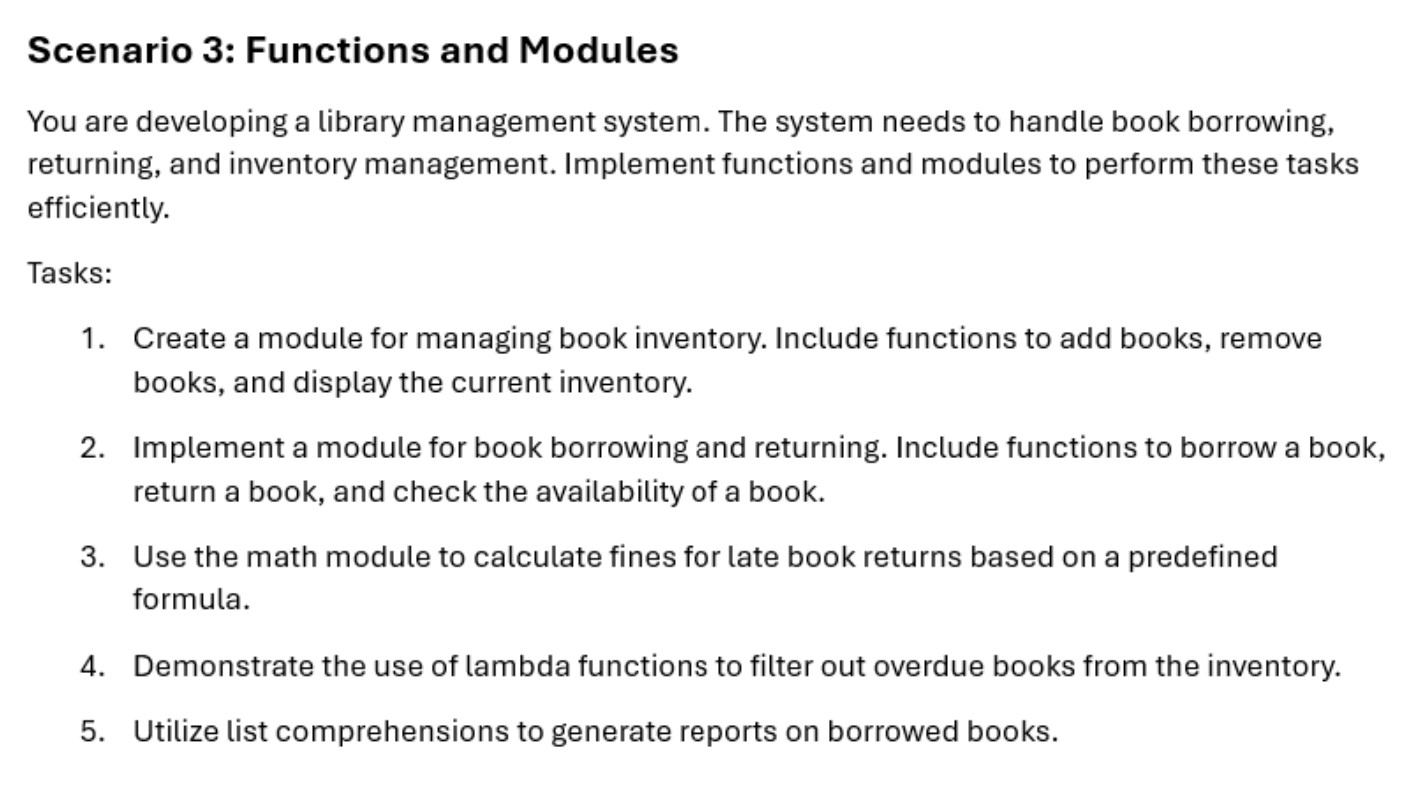

In [16]:
import math
from datetime import date, timedelta

inventory = {}

def add_book(title, author, quantity):
    inventory[title] = {"author": author, "quantity": quantity, "borrowed": 0}
    print(f"Book '{title}' added to inventory.")

def remove_book(title):
    if title in inventory:
        del inventory[title]
        print(f"Book '{title}' removed from inventory.")
    else:
        print(f"Book '{title}' not found in inventory.")

def display_inventory():
    print("\nCurrent Inventory:")
    if not inventory:
        print("No books available.")
    else:
        for title, info in inventory.items():
            print(f"{title} by {info['author']} - {info['quantity']} copies (Borrowed: {info['borrowed']})")


borrowed_books = {}

def borrow_book(title, borrower):
    if title in inventory and inventory[title]["quantity"] > 0:
        inventory[title]["quantity"] -= 1
        inventory[title]["borrowed"] += 1
        borrow_date = date.today()
        due_date = borrow_date + timedelta(days=7)
        borrowed_books[title] = {"borrower": borrower, "borrow_date": borrow_date, "due_date": due_date}
        print(f"{borrower} borrowed '{title}'. Due date: {due_date}")
    else:
        print(f"Sorry, '{title}' is not available.")

def return_book(title):
    if title in borrowed_books:
        borrow_info = borrowed_books.pop(title)
        inventory[title]["quantity"] += 1
        inventory[title]["borrowed"] -= 1
        print(f"'{title}' has been returned by {borrow_info['borrower']}.")
    else:
        print(f"'{title}' was not borrowed.")


def check_availability(title):
    if title in inventory:
        available = inventory[title]["quantity"]
        print(f"'{title}' - Available copies: {available}")
    else:
        print(f"'{title}' not found in inventory.")


def calculate_fine(days_late):
    if days_late > 0:
        fine = round(math.sqrt(days_late) * 5, 2)
        print(f"Late by {days_late} days → Fine: ${fine}")
        return fine
    else:
        print("No fine.")
        return 0


def get_overdue_books():
    today = date.today()
    overdue = list(filter(lambda x: borrowed_books[x]["due_date"] < today, borrowed_books))
    return overdue


def borrowed_books_report():
    report = [f"{title} borrowed by {info['borrower']} (Due: {info['due_date']})"
              for title, info in borrowed_books.items()]
    return report


if __name__ == "__main__":
    add_book("Python Basics", "John Smith", 3)
    add_book("AI for Beginners", "Sara Khan", 2)
    add_book("Data Science 101", "Alex Doe", 1)

    display_inventory()

    borrow_book("Python Basics", "Areeb")
    borrow_book("AI for Beginners", "Urooj")

    display_inventory()
    check_availability("Python Basics")

    calculate_fine(9)

    borrowed_books["AI for Beginners"]["due_date"] = date.today() - timedelta(days=2)
    overdue = get_overdue_books()
    print("\nOverdue Books:", overdue)

    report = borrowed_books_report()
    print("\nBorrowed Books Report:")
    for item in report:
        print(item)

    return_book("Python Basics")
    display_inventory()


Book 'Python Basics' added to inventory.
Book 'AI for Beginners' added to inventory.
Book 'Data Science 101' added to inventory.

Current Inventory:
Python Basics by John Smith - 3 copies (Borrowed: 0)
AI for Beginners by Sara Khan - 2 copies (Borrowed: 0)
Data Science 101 by Alex Doe - 1 copies (Borrowed: 0)
Areeb borrowed 'Python Basics'. Due date: 2025-10-12
Urooj borrowed 'AI for Beginners'. Due date: 2025-10-12

Current Inventory:
Python Basics by John Smith - 2 copies (Borrowed: 1)
AI for Beginners by Sara Khan - 1 copies (Borrowed: 1)
Data Science 101 by Alex Doe - 1 copies (Borrowed: 0)
'Python Basics' - Available copies: 2
Late by 9 days → Fine: $15.0

Overdue Books: ['AI for Beginners']

Borrowed Books Report:
Python Basics borrowed by Areeb (Due: 2025-10-12)
AI for Beginners borrowed by Urooj (Due: 2025-10-03)
'Python Basics' has been returned by Areeb.

Current Inventory:
Python Basics by John Smith - 3 copies (Borrowed: 0)
AI for Beginners by Sara Khan - 1 copies (Borrowed

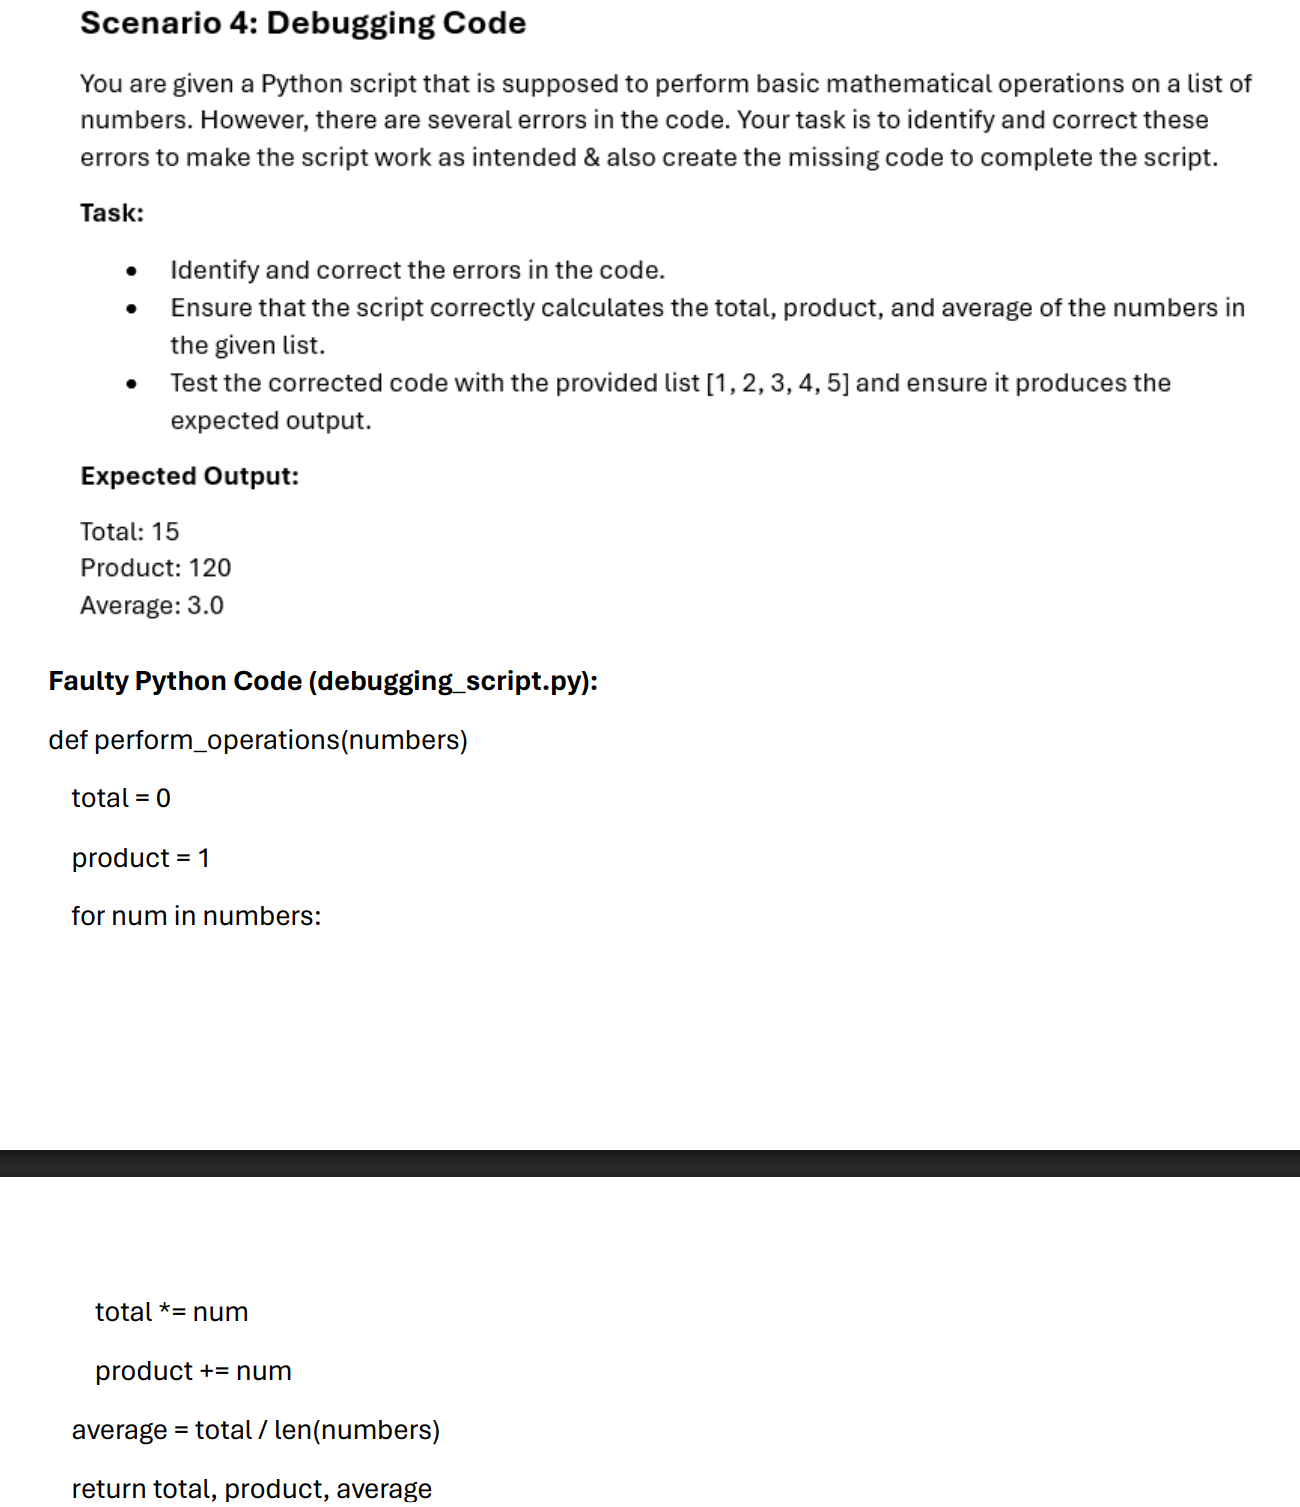

In [17]:

def perform_operations(numbers):
    total = 0
    product = 1

    for num in numbers:
        total += num       
        product *= num     

    average = total / len(numbers)
    return total, product, average


numbers = [1, 2, 3, 4, 5]
total, product, average = perform_operations(numbers)

print("Total:", total)
print("Product:", product)
print("Average:", average)


Total: 15
Product: 120
Average: 3.0
